##  MicroGrad Demo

#### Imports & Config

In [1]:
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs

%matplotlib inline

In [2]:
sys.path.append("..")
from core.engine import Value
from core.nn import Neuron, Layer, MLP

In [3]:
np.random.seed(1337)
random.seed(1337)

#### Data

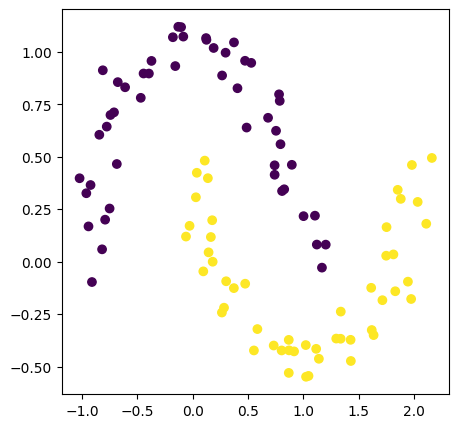

In [4]:
X, y = make_moons(n_samples=100, noise=0.1)
y = y * 2 - 1

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y)

#### Model

In [5]:
model = MLP(2, [16, 16, 1])

In [6]:
def loss():
    inputs = [list(map(Value, xrow)) for xrow in X]
    scores = list(map(model, inputs))
    losses = [(1 + -yi * score).relu() for yi, score in zip(y, scores)]
    total_loss = sum(losses) / len(losses)
    accuracy = [(yi > 0) == (score.data > 0) for yi, score in zip(y, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

In [7]:
k = 1
acc = 0
while acc < 0.995:
    total_loss, acc = loss()
    model.zero_grad()
    total_loss.backward()
    learning_rate = 1.0 - 0.9 * k / 100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    print(f"Step {k} accuracy: {acc*100}%")
    k += 1

Step 1 accuracy: 50.0%
Step 2 accuracy: 81.0%
Step 3 accuracy: 77.0%
Step 4 accuracy: 82.0%
Step 5 accuracy: 84.0%
Step 6 accuracy: 87.0%
Step 7 accuracy: 89.0%
Step 8 accuracy: 91.0%
Step 9 accuracy: 91.0%
Step 10 accuracy: 92.0%
Step 11 accuracy: 92.0%
Step 12 accuracy: 92.0%
Step 13 accuracy: 94.0%
Step 14 accuracy: 90.0%
Step 15 accuracy: 90.0%
Step 16 accuracy: 92.0%
Step 17 accuracy: 93.0%
Step 18 accuracy: 94.0%
Step 19 accuracy: 95.0%
Step 20 accuracy: 93.0%
Step 21 accuracy: 89.0%
Step 22 accuracy: 87.0%
Step 23 accuracy: 91.0%
Step 24 accuracy: 94.0%
Step 25 accuracy: 96.0%
Step 26 accuracy: 97.0%
Step 27 accuracy: 95.0%
Step 28 accuracy: 95.0%
Step 29 accuracy: 93.0%
Step 30 accuracy: 97.0%
Step 31 accuracy: 96.0%
Step 32 accuracy: 95.0%
Step 33 accuracy: 97.0%
Step 34 accuracy: 97.0%
Step 35 accuracy: 97.0%
Step 36 accuracy: 95.0%
Step 37 accuracy: 95.0%
Step 38 accuracy: 97.0%
Step 39 accuracy: 98.0%
Step 40 accuracy: 96.0%
Step 41 accuracy: 98.0%
Step 42 accuracy: 97.0%
S

(-1.548639298268643, 1.951360701731357)

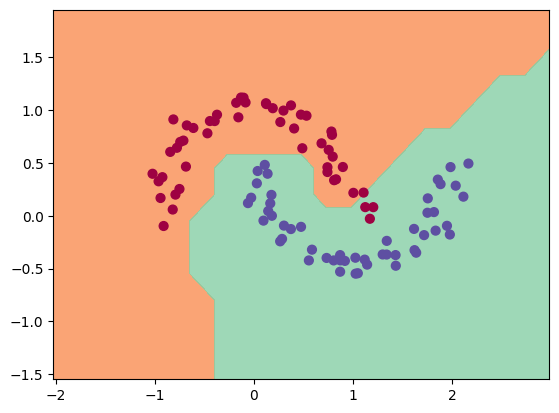

In [8]:
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())